![](https://velog.velcdn.com/images/kms1003/post/229d8855-12b1-48fe-a002-bb24d0a88b7c/image.png)
[데이터 과학을 위한 통계 - 한빛미디어](http://www.kyobobook.co.kr/product/detailViewKor.laf?mallGb=KOR&ejkGb=KOR&barcode=9791162244180)

### 필요한 라이브러리 import

In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pylab as plt
import random

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### 데이터 불러오기

In [2]:
state = pd.read_csv("state.csv")
dfw = pd.read_csv("dfw_airline.csv")
sp500_px = pd.read_csv("sp500_data.csv/sp500_data.csv", index_col=0)
sp500_sym = pd.read_csv("sp500_data.csv/sp500_sectors.csv")
kc_tax = pd.read_csv("kc_tax.csv/kc_tax.csv")
lc_loans = pd.read_csv("lc_loans.csv")
airline_stats = pd.read_csv('airline_stats.csv')
loans_income = pd.read_csv("loans_income.csv")
session_times = pd.read_csv("web_page_data.csv")
lung = pd.read_csv("LungDisease.csv")
house = pd.read_csv("house.csv", sep='\t')

## 탐색적 데이터 분석

### <span style="color:olivedrab">개요</span>

고전적인 통계학에서는 적은 표본을 가지고 더 큰 모집단에 대한 결론을 도출하는 **`추론`**이라는 과정을 다루었다.

1962년, 존 투키의 논문 **<데이터 분석의 미래>**에서 통계적 추론을 하나의 구성 요소로 보는 **`데이터 분석`**이라는 새로운 과학적 학문을 제안했다.


이후 투키는 통계를 공학과 컴퓨터 과학에 접목시키는 꾸준한 노력 끝에 **`데이터 과학`**의 한 토대가 되었다.

1977년, 투키의 책 <탐색적 데이터 분석>을 통해 요약통계량과 함께 데이터 집합을 그림으로 표현하는 **`탐색적 데이터 분석`**이라는 분야가 정립되었다.

탐색적 데이터 분석은 새로운 기술이 급속히 발전되고, 접근 가능한 데이터가 더욱 많아지며, 많은 분석들이 다양한 학문에서 활용되면서 원래 범주를 뛰어넘어 진화하고 있다.

### <span style="color:olivedrab">정형화된 데이터의 요소</span>

먼저, 통계적 개념을 활용하기 위해서는 정형화되지 않은 원시 데이터를 가공해 정형화된 형태로 변환해야 한다.

> 정형 데이터 : 행과 열이 있는 테이블 형태

정형 데이터는 크게 두 가지로 나눌 수 있다.

1. 수치형 데이터
    - 연속형 데이터 (시간, 풍속)
    - 이산형 데이터 (사건의 발생 빈도)
2. 범주형 데이터
	- 일반적인 범주형 데이터 (범위가 정해진 값)
    - 이진 데이터 (0/1, 참/거짓)
    - 순서형 데이터 (범주 안의 값들이 순위를 가지는 경우)

<span style="color:slateblue">**데이터를 분석하고 예측을 모델링할 때, 데이터 종류를 분류하는 것은 시각화, 해석, 통계 모델 결정 등에 중요한 역할을 한다.**</span>


### <span style="color:olivedrab">테이블 데이터</span>

테이블 데이터는 데이터 분석에서 가장 대표적으로 사용되는 객체의 형태이다.

> 테이블 데이터 : 행과 열로 이루어진 2차원 행렬

|프로그래밍 언어|테이블 데이터 형식|
|-|-|
|Excel|스프레드시트|
|DB|테이블|
|Python, R|데이터프레임|

데이터는 항상 테이블 데이터의 형태로 이루어지지 않으므로, 비정형 데이터는 테이블 데이터의 형태로 표현되도록 처리해야 한다.

테이블 데이터의 맨 오른쪽 열에는 분석하고자 하는 변수인 결과 변수에 대한 값들로 이루어져 있다.

#### <span style="color:dodgerblue">데이터프레임과 인덱스</span>

파이썬에서는 pandas 라이브러리에서 Dataframe 객체를 제공한다.

보통 데이터프레임에는 각 행마다 순차적으로 정수값을 붙여 인덱스로 사용한다. 이로써 데이터베이스의 쿼리 성능을 향상시킨다.

#### <span style="color:dodgerblue">테이블 형식이 아닌 데이터 구조</span>

- 시계열 데이터
- 공간 데이터
- 그래프 데이터
...

각 데이터에 맞는 특화된 방법론을 사용한다.

### <span style="color:olivedrab">위치 추정</span>

위치 추정은 데이터가 주어졌을 때, 데이터를 살펴보는 가장 기초적인 단계로, 각 변수의 대표값을 파악하게 된다.

#### <span style="color:dodgerblue">평균</span>

평균 : 계산 간단하지만, 대표값에 부적합한 경우가 많다.

평균을 대체해 **`절사평균`**을 사용함

절사평균 : $x_1$부터 $x_n$까지 오름차순으로 정렬 후, p개의 가장 크고 작은 값들을 제외한 뒤에 평균을 계산해 극단값의 영향을 제거한다.
ex) 국제 다이빙 대회 : 5명의 심판이 매긴 점수 중 가장 높고 낮은 점수를 제외한 나머지 3명의 점수를 평균한 값으로 최종 점수 계산

가중평균 : 각 데이터값에 사용자가 지정한 가중치를 곱한 값들의 총합을 가중치의 총합으로 나누어 계산한다.

#### <span style="color:dodgerblue">중간값, 특이값</span>

중간값 : 데이터에 매우 민감한 평균보다 위치 추정에 더 유리하다.

특이값 (outlier) : 데이터 집합에서 다른 값들과 매우 멀리 떨어져 있는 값
특이값이 발생한 원인에 대해 살펴보는 것이 중요함
- 에러에 의해 발생했는지 올바른 수집이었는지 파악
    
중간값은 로버스트하지만, 오직 하나에 대한 값이므로 부정확할 수 있다.

- 중간값과 평균의 절충안인 절사평균을 사용한다.

#### 인구에 따른 살인 비율의 위치 추정

In [3]:
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [4]:
state['Murder.Rate'].describe()

count    50.000000
mean      4.066000
std       1.915736
min       0.900000
25%       2.425000
50%       4.000000
75%       5.550000
max      10.300000
Name: Murder.Rate, dtype: float64

In [5]:
state['Population'].describe()

count    5.000000e+01
mean     6.162876e+06
std      6.848235e+06
min      5.636260e+05
25%      1.833004e+06
50%      4.436370e+06
75%      6.680312e+06
max      3.725396e+07
Name: Population, dtype: float64

In [6]:
print(f"평균 : {state['Population'].mean()}")
print(f"절사평균 : {trim_mean(state['Population'], 0.1)}")
print(f"중앙값 : {state['Population'].median()}")

평균 : 6162876.3
절사평균 : 4783697.125
중앙값 : 4436369.5


In [7]:
print(f"가중평균 : {np.average(state['Murder.Rate'], weights=state['Population'])}")

가중평균 : 4.445833981123393


### <span style="color:olivedrab">변이 추정</span>

변이 : 데이터가 얼마나 밀집해 있는지 혹은 퍼져 있는지를 나타내는 산포도

다양한 변이 추정 방법이 존재함

#### <span style="color:dodgerblue">편차들의 대표값 추정</span>

- 평균절대편차 : 편차의 절대값의 평균 (항상 양의 편차)
- 분산 : 제곱편차의 평균
- 표준편차 : 분산의 제곱근

분산을 구할 때 분모에 n이 아닌 n-1을 사용하는 이유
- 표준편차는 표본의 평균에 따른다는 단 하나의 제약 조건을 가지므로 n-1의 자유도를 갖는다.

> 자유도 : 추정값을 계산할 때의 제약조건의 개수

평균절대편차, 분산, 표준편차 모두 특이값에 로버스트하지 않다.

- 대체 수단으로 중간값의 중위절대편차 사용

#### <span style="color:dodgerblue">백분위수에 기초한 추정</span>

> 순서통계량 : 정렬 데이터를 나타내는 통계량

범위 : 가장 큰 값과 작은 값의 차이
- 특이값에 매우 민감하므로 변이 측정하는데 부적절

백분위수 사이의 차이를 통해 추정 가능
- **`사분위범위`** 사용

#### 주별 인구의 변이 추정

In [8]:
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [9]:
print(f"표준편차 : {state['Population'].std():.2f}")
print(f"사분위범위 : {state['Population'].quantile(0.75) - state['Population'].quantile(0.25):.2f}")
print(f"중위절대편차 : {robust.scale.mad(state['Population']):.2f}")

표준편차 : 6848235.35
사분위범위 : 4847308.00
중위절대편차 : 3849876.15


### <span style="color:olivedrab">데이터 분포 탐색하기</span>

지금까지의 추정은 위치, 변위를 나타내기 위한 하나의 수치로 데이터를 요약한 것이다.

데이터가 전반적으로 어떻게 분포하고 있는지 파악하는 것도 중요하다.

#### <span style="color:dodgerblue">백분위수와 상자그림</span>

- 상자그림 : 백분위수를 이용해 데이터의 분산을 손쉽게 시각화하는 방법

    - 상자는 25%부터 75%까지, 상자 안의 굵은 값은 중간값
    
    - 위아래의 점선(수염)은 사분위범위의 1.5배 이내
    
    - 수염 바깥쪽 데이터(특잇값)는 하나의 점 또는 원으로 표현

In [10]:
# 주별 살인율의 백분위수
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

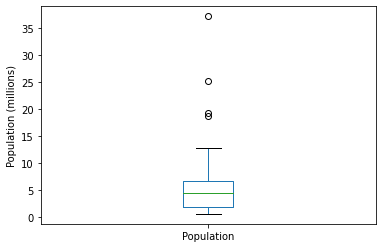

In [11]:
# 주별 인구의 상자그림
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

#### <span style="color:dodgerblue">도수분포표와 히스토그램</span>

- 도수분포표 : 변수의 범위를 동일한 크기의 구간으로 나누고, 각 구간마다 변수값의 수를 나타냄

In [12]:
# 주별 인구의 도수분포표
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64

Text(0.5, 0, 'Population (millions)')

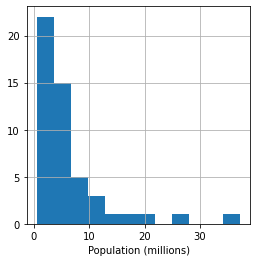

In [13]:
# 주별 인구의 히스토그램
ax = (state['Population'] / 1_000_000).hist(figsize=(4,4), bins=12)
ax.set_xlabel('Population (millions)')

#### <span style="color:dodgerblue">밀도 그림과 추정</span>

- 밀도 그림 : 데이터의 분포를 연속된 선으로 나타냄 (부드러운 히스토그램)
    - 밀도 곡선 아래의 면적은 1
    - y축은 개수가 아닌 비율

Text(0.5, 0, 'Murder Rate (per 100,000)')

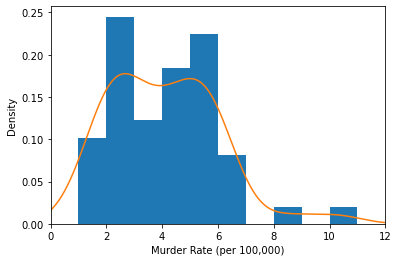

In [14]:
# 주별 살인율 밀도 그림
ax = state['Murder.Rate'].hist(density=True, bins=range(1,12))
ax.set_xlim([0,12])
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

### <span style="color:olivedrab">이진 데이터와 범주 데이터 탐색하기</span>

이진 변수 : 0과 1 중 1을 중요한 변수로 설정한다.

막대 도표 : 가장 흔한 범주형 자료 시각화 방법

- 막대 도표 vs 히스토그램
    - 막대 도표의 x축은 각 요인변수의 서로 다른 범주들을 나타냄
    - 히스토그램의 x축은 수치적으로 나타낼 수 있는 하나의 변수값

In [15]:
dfw.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


Text(0, 0.5, 'Count')

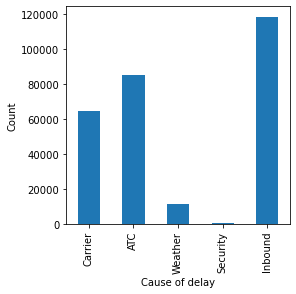

In [16]:
# 항공기 운행 지연 요인 횟수의 막대도표
ax = dfw.transpose().plot.bar(figsize=(4,4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

#### <span style="color:dodgerblue">최빈값</span>

- 최빈값 : 데이터에서 가장 자주 등장하는 값 (최다 빈도수)

#### <span style="color:dodgerblue">기댓값</span>

- 기댓값 : 각 범주에 해당하는 수치형 변수들이 존재하는 경우에 사용

#### <span style="color:dodgerblue">확률</span>

- 확률 : 사건이 발생할 비율

### <span style="color:olivedrab">상관관계</span>

- 피어슨 상관계수 : 변수 1, 2 각각의 평균으로부터의 편차들을 서로 곱한 값들의 평균을 각 변수의 표준편차 곱으로 나눠준 값
    - 항상 -1과 1 사이 값

변수들이 선형적 관계를 갖지 않으면 상관계수는 무의미

상관행렬을 이용해 여러 변수들 사이의 관계를 시각화할 수 있다.

상관계수도 데이터의 특이값에 민감 -> 상관계수를 대체할 로버스트한 다른 방법들 존재

In [17]:
sp500_px

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.000000,0.060124,-0.022100,0.000000,0.000000,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.000000,0.000000,0.347160,0.000000,0.041670,0.000000,0.015564,1.750000,0.125000,0.000000
1993-02-01,0.000000,-0.180389,0.027621,0.000000,0.000000,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.000000,0.000000,-0.231440,0.000000,0.000000,-0.010410,0.007782,1.250000,0.125000,0.000000
1993-02-02,0.000000,-0.120257,0.035900,0.000000,0.000000,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.000000,0.000000,-0.115720,0.000000,0.000000,0.000000,-0.007792,-0.250000,0.000000,0.000000
1993-02-03,0.000000,0.060124,-0.024857,0.000000,0.000000,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.000000,0.000000,-0.086790,0.000000,0.041670,-0.041670,-0.038919,-0.500000,0.062500,0.000000
1993-02-04,0.000000,-0.360770,-0.060757,0.000000,0.000000,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.000000,0.000000,0.144650,0.000000,-0.041660,-0.031260,-0.046711,0.000000,0.062500,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-25,0.019989,-0.529999,-0.379997,0.080002,0.350003,-0.580002,-0.457999,-1.720001,-0.009936,0.039997,...,-2.500000,1.889999,-2.060012,0.150002,-1.630004,-0.990005,-2.250000,1.270019,-1.919998,-0.080002
2015-06-26,-1.299988,-0.330000,-0.390004,-1.820000,0.190003,0.330002,-0.328565,-0.769989,0.020000,0.000000,...,-0.070007,-2.380005,-1.390000,0.550004,-3.509979,-1.080002,-0.800003,-1.900024,-3.629997,0.440002
2015-06-29,-10.299988,-0.410000,-0.670002,-1.250000,-1.919998,-0.510002,-0.139999,-0.949997,-0.100000,-0.040001,...,-2.250000,-5.490005,-5.029999,0.090000,-8.290009,-1.209999,-2.419998,-9.620026,-3.770004,-2.479996
2015-06-30,-2.109986,-0.049999,-0.559997,-0.099999,-0.689999,-0.610001,0.239999,-1.330001,-0.200000,0.020001,...,-0.299988,0.270004,0.279999,-1.710001,0.390014,0.439995,-0.209999,-2.070007,-0.849999,-1.360001


In [18]:
sp500_sym

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH
...,...,...,...,...
512,health_care,Health Care,biotechnology,CELG
513,health_care,Health Care,biotechnology,GILD
514,health_care,Health Care,biotechnology,REGN
515,health_care,Health Care,biotechnology,VRTX


<AxesSubplot:>

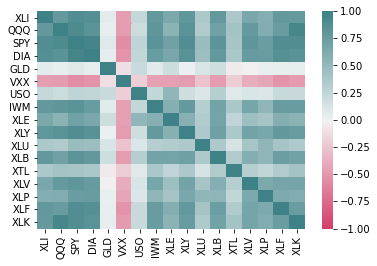

In [19]:
# etf 수익 간 상관관계 (히트맵)
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
sns.heatmap(etfs.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(0,200,as_cmap=True))

#### <span style="color:dodgerblue">산점도</span>

- 산점도 : 두 변수 사이의 관계를 시각화하는 가장 기본적인 방법

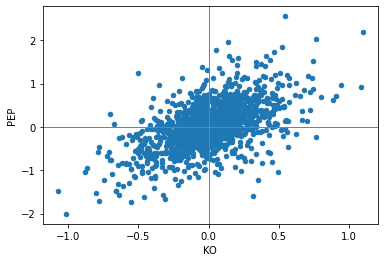

In [20]:
# 코카콜라와 펩시의 일일 수익 산점도
sp500_px = sp500_px[sp500_px.index > '2010-01-01']
ax = sp500_px.plot(kind='scatter', x='KO', y='PEP')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

### <span style="color:olivedrab">다변량분석</span>

일변량분석 - 평균, 분산

이변량분석 - 상관관계

다변량분석 : 셋 이상의 변수 분석

이변량, 다변량 분석의 형태는 데이터의 특성, 형태에 따라 달라진다!

#### <span style="color:dodgerblue">육각형 구간과 등고선 (수치형 VS 수치형)</span>

산점도 : 데이터 개수가 많아지면 비효율

육각형 구간 : 점으로 표시하지 않고, 기록값을 육각형 모양의 구간들로 나눈 다음, 각 구간에 포함된 기록값의 개수에 따라 색 표시

등고선 : 산점도 위에 등고선을 사용하고, 등고선 위의 점들은 밀도를 의미한다.

꼭대기로 갈수록 밀도가 높아진다.

In [21]:
kc_tax.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


In [22]:
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) &
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500)]
kc_tax0

,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


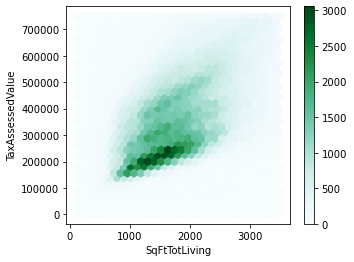

In [23]:
# 집의 크기와 과세 평가액을 나타낸 육각형 구간 도표
ax = kc_tax0.plot(kind='hexbin', x='SqFtTotLiving', y='TaxAssessedValue', gridsize=30, sharex=False, figsize=(5,4))

#### <span style="color:dodgerblue">범주형 vs 범주형</span>

- 분할표 : 두 범주형 변수를 요약하는데 효과적 방법, 범주별 빈도수를 기록한 표

In [24]:
lc_loans

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B
...,...,...
450956,Current,D
450957,Current,D
450958,Current,D
450959,Current,D


In [25]:
crosstab = lc_loans.pivot_table(index='grade', columns='status', aggfunc=lambda x: len(x), margins=True)
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [26]:
# 대출 등급과 상황에 대한 분할표
df = crosstab.loc['A':'G',:].copy()
df.loc[:,'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


#### <span style="color:dodgerblue">범주형 vs 수치형</span>

- 상자그림 : 범주형 변수에 따라 분류된 수치형 변수의 분포를 시각화
- 바이올린 도표 : 상자그림을 보완한 형태로, 밀도추정 결과를 동시에 시각화해 상자그림에서 보이지 않는 데이터 분포 파악 가능

In [27]:
airline_stats

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


Text(0.5, 0.98, '')

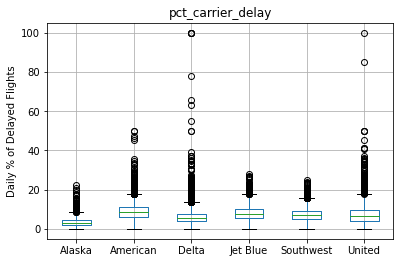

In [28]:
# 항공기 지연 비율 상자그림
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

C:\Users\kms10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Daily % of Delayed Flights')

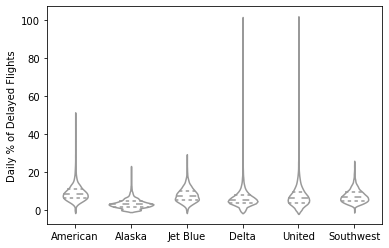

In [29]:
ax = sns.violinplot(airline_stats.airline, airline_stats.pct_carrier_delay, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

### <span style="color:olivedrab">결론</span>

존 투키에 의해 시작된 탐색적 데이터 분석 (EDA) 은 데이터 과학 분야에 초석

- 데이터를 다루는 모든 프로젝트에서 가장 우선적이며 가장 중요한 과정

- 데이터를 들여보고, 요약, 시각화하는 것을 통해 프로젝트에 대한 가치 있는 통찰과 이해를 해야 한다!

## 데이터와 표본분포

빅데이터 시대가 되어도 다양한 데이터를 효과적으로 다루고, 데이터 편향을 최소화하기 위해 **`표본추출`**은 여전히 중요하다!

### <span style="color:olivedrab">임의표본추출과 표본편향</span>

- **`표본`** : 더 큰 데이터 집합 (모집단) 으로부터 얻은 데이터의 부분집합

- **`임의표본추출`** : 모집단 내의 선택 가능한 원소들을 무작위로 추출하는 과정 (모든 원소들이 동일한 확률로 추출)

- **`단순임의표본`**: 임의표본추출에 의해 얻은 샘플

재추출방법 : **`복원추출`**, **`비복원추출`**

샘플 기반의 추정, 모델링에서 데이터 품질은 데이터 양보다 중요함

데이터 품질 : 완결성, 형식의 일관성, 깨끗함 및 각 데이터 값의 정확성

대표성에 대한 대표적 사례
- 리터러리 다이제스트 vs 조지 갤럽
    - 리터러리 다이제스트는 1000만명에게 투표 but, 대선 예측 실패
    - 조지 갤럽은 단 2000명에게 투표, 대선 예측 성공
    - 리터러리 다이제스트는 선정 방식보다 수를 늘리는데 집중 -> 사회경제적 지위가 높은 사람들을 조사 대상으로 한 결과, **`표본편향`** 발생
    - **`비임의`** : 모집단과 표본 사이의 차이가 유의미할 만큼 큼

#### <span style="color:dodgerblue">편향</span>

임의표본추출로 인한 오류와 편향으로 인한 오류를 구분해야 한다!

- 임의표본추출로 인한 오류 : 모든 방향에서 오차 발생
- 편향으로 인한 오류 : 특정 방향에서 오차 발생

#### <span style="color:dodgerblue">임의 선택</span>

조지 갤럽은 표본편향 문제를 해소하여 미국 유권자를 대표하는 표본을 얻기 위해, 과학적으로 조사자를 선정함
- 핵심 : 임의표본추출을 통해 대표성 담보
1. 접근 가능한 모집단을 적절하게 정의하는게 중요함
2. 표본추출 절차 결정

- **`층화표본추출`** : 모집단을 여러 층으로 나누고, 각 층에서 무작위로 샘플 추출
    - 대표성을 담보하지 못할 가능성이 있는 단순임의표본 보완

### <span style="color:olivedrab">선택편향</span>

- **`선택편향`** : 데이터를 의식적이든 무의식적이든 선택적으로 고르는 관행 -> 오해의 소지가 있거나 단편적인 결론 발생

- **`데이터 스누핑`** : 갖고 있는 데이터를 통해 결론에 이르는 것이 아닌, 원하는 결과를 도출하기 위해 데이터를 얻는 행위

데이터를 반복적으로 조사하는 것은 데이터 과학에서 중요한 가치 명제이므로 선택편향에 대해 조심해야 한다!

선택편향의 형태
1. 방대한 검색 효과
    - 큰 데이터 집합으로 계속해서 모델을 설계하고, 질문을 던지다 보면 흥미로운 것을 발견하게 된다.
    - 이것이 정말 의미 있는 결과인가? 우연히 얻은 예외의 경우가 아닌가?
    - **둘 이상의 홀드아웃 세트 이용 (목푯값 섞기)**
2. 비임의표본추출
3. 데이터 체리 피킹

#### <span style="color:dodgerblue">평균으로의 회귀</span>

주어진 어떤 변수를 연속적으로 측정했을 때 나타나는 현상

예외적인 경우가 관찰되면 그 이후에는 평균 정도의 경우가 관찰되는 경향이 있음

일종의 선택편향으로 인해 발생함

ex) 신인 선수의 2년차 징크스

### <span style="color:olivedrab">통계학에서의 표본분포</span>

- **`표본분포`** : 하나의 동일한 모집단에서 얻은 여러 표본에 대한 통계량의 분포

추출한 표본에 따라 결과가 다를 수 있다. 표본에 따라 결과가 얼마나 달라질지에 관심 (**표본의 변동성**)

보통의 경우, 표본이 클수록 표본통계량의 분포는 좁아짐


#### <span style="color:dodgerblue">중심극한정리</span>

모집단이 정규분포가 아니더라도, 표본의 크기가 충분하고 데이터가 정규성을 크게 이탈하지 않는 경우, 여러 표본에서 추출한 평균은 종 모양의 정규곡선을 따른다.

통계학에서는 중요한 개념, 데이터 과학에서는 부트스트랩을 사용하므로 덜 중요한 개념

#### <span style="color:dodgerblue">표준오차</span>

표본분포의 변동성을 의미하는 단일 측정 지표

표본 값들의 표준편차 s / 표본크기 n의 제곱근

표본크기가 커지면 표준오차가 감소
- n 제곱근의 법칙
- 표준오차가 2배로 감소하면 표본크기는 4배로 증가시켜야 한다.

표준오차를 측정할 때 고려할 사항
1. 모집단에서 완전히 새로운 샘플들을 많이 수집해야 함
2. 각각의 새 샘플에 대해 통계량 계산
3. 통계량의 표준편차를 계산하고, 표준오차의 추정치로 사용

현대 통계에서 부트스트랩은 표준오차를 추정하는 표준 방법

- 표준편차 vs 표준오차
    - 표준편차 : 개별 데이터 포인트의 변동성
    - 표준오차 : 표본 측정 지표의 변동성

### <span style="color:olivedrab">부트스트랩</span>

통계량, 모델 파라미터의 표본분포를 추정하는 쉽고 효과적인 방법

현재 있는 표본에서 추가적으로 표본을 복원추출하고 각 표본에 대한 통계량과 모델을 다시 계산함

뽑을 때마다 각 원소가 뽑힐 확률은 유지하면서, 무한한 크기의 모집단 생성 가능

**크기 n의 샘플의 평균을 구하는 부트스트랩 재표본추출 알고리즘**
1. 샘플 값을 하나 뽑아서 기록하고 다시 복원시킨다.
2. n번 반복한다.
3. 재표본추출된 값의 평균을 기록한다.
4. 1~3단계를 R번 반복
5. R개의 결과를 사용하여
    1) 표준편차 계산
    2) 히스토그램, 상자그림 시각화
    3) 신뢰구간 계산
    
**배깅** : 여러 부트스트랩 샘플로 여러 의사 결정 트리 사용

In [30]:
loans_income

,x
0,67000
1,52000
2,100000
3,78762
4,37041
...,...
49995,40000
49996,54000
49997,50000
49998,82000


In [31]:
# 부트스트랩을 통해 표준오차 계산
from sklearn.utils import resample

results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('부트스트랩 통계량 : ')
print(f'original : {loans_income.median()}')
print(f'bias : {results.mean() - loans_income.median()}')
print(f'std. error : {results.std()}')
print(results)

부트스트랩 통계량 : 
original : x    62000.0
dtype: float64
bias : x   -72.1635
dtype: float64
std. error : 202.03824135227154
0      x    62000.0
dtype: float64
1      x    62000.0
dtype: float64
2      x    61500.0
dtype: float64
3      x    62000.0
dtype: float64
4      x    62000.0
dtype: float64
                  ...             
995    x    62000.0
dtype: float64
996    x    62000.0
dtype: float64
997    x    62000.0
dtype: float64
998    x    61402.0
dtype: float64
999    x    62000.0
dtype: float64
Length: 1000, dtype: object


### <span style="color:olivedrab">신뢰구간</span>

단일 수치 (점추정) 가 아닌 범위로 추정치 제시

90%, 95%와 같이 항상 백분율로 표현되는 포함 수준과 함께 제시

90% 신뢰구간 - 표본통계량의 부트스트랩 표본분포의 90%를 포함하는 구간

표본크기 n과 관심 있는 표본통계량이 주어졌을 때의 부트스트랩 신뢰구간 구하는 법
1. 데이터에서 복원추출 방식으로 크기 n인 표본을 뽑는다.
2. 재표본추출한 표본에 대해 원하는 통계량 기록
3. 1~2단계 R번 반복
4. x% 신뢰구간을 구하기 위해, R개의 재표본 결과의 분포 양쪽 끝에서 [(100-x)/2]% 잘라냄
5. 절단한 점들은 x% 부트스트랩 신뢰구간의 양 끝점

- **신뢰수준** : 신뢰구간과 관련된 백분율

신뢰수준이 높을수록 구간이 더 넓어진다.
(불확실성 증가)

표본이 작을수록 구간이 넓어진다.
(불확실성 증가)

### <span style="color:olivedrab">정규분포</span>

정규분포는 통계의 역사적 발전에 필수적인 개념

데이터의 68%는 평균의 표준편차 내에 속한다.

95%는 표준편차 두배수 내에 속한다.

#### <span style="color:dodgerblue">표준정규분포와 QQ 그림</span>

**표준정규분포** : x축의 단위가 평균의 표준편차로 표현되는 정규분포

데이터에서 평균을 빼고 표준편차로 나누는 과정 (**정규화, 표준화**) 를 통해 표준정규분포와 같은 척도로 변환

표준화를 통해 변환한 값 : **z 점수**

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

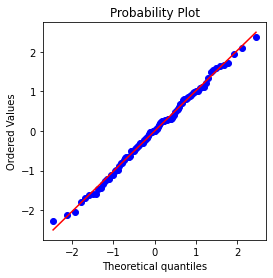

In [32]:
# 표본정규분포로부터 추출한 100개 표본의 QQ 그림
from scipy import stats

fig, ax = plt.subplots(figsize=(4,4))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

### <span style="color:olivedrab">긴 꼬리 분포</span>

데이터는 일반적으로 정규분포를 따르지 않음

소득 데이터처럼 비스듬하게 기울어져 있거나 이항 데이터와 같이 이산적일 수 있음

대칭, 비대칭 분포 모두 긴 꼬리를 가질 수 있다.

분포의 꼬리는 양 극한값에 해당하고, 양쪽 긴 꼬리를 잘 들여다보는 것이 중요!

긴 꼬리의 대표적인 사례 : 주가수익률

**흑고니 이론** : 주식시장의 붕괴와 같은 이례적인 사건이, 정규분포로 예측되는 것보다 훨씬 자주 일어날 수 있다.

((array([-3.33278964, -3.07756454, -2.93575124, ...,  2.93575124,
          3.07756454,  3.33278964]),
  array([-6.60529819, -6.09667121, -5.40220961, ...,  5.12547859,
          5.87072271,  6.03787   ])),
 (1.4823778663727063, 0.0015561067366313156, 0.9941828221936324))

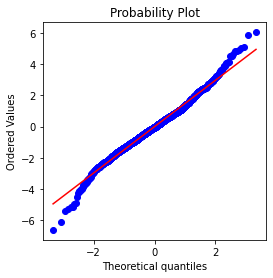

In [33]:
sp500_px = pd.read_csv("sp500_data.csv/sp500_data.csv", index_col=0)
sp500_sym = pd.read_csv("sp500_data.csv/sp500_sectors.csv")

# 넷플릭스의 일일 주식 수익률에 대한 QQ 그림
nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))
fig, ax = plt.subplots(figsize=(4,4))
stats.probplot(nflx, plot=ax)

낮은 값의 점들은 대각선보다 훨씬 낮고, 높은 값은 선보다 훨씬 위에 존재함.
- 데이터가 정규분포를 따르지 않는다.
- 예상보다 많은 극단값을 관찰할 가능성이 있다.
- 평균에서 표준편차 이내에 있는 점들은 선 가까이에 있다.
    - 중간에서는 정상
    - 긴 꼬리를 갖는다

### <span style="color:olivedrab">스튜던트의 t분포</span>

t분포 : 정규분포와 비슷하지만, 꼬리 부분이 더 길고 두꺼움

표본통계량의 분포를 설명하는데 사용

표본이 클수록 정규분포에 가까운 t분포

t분포와 표준화된 여러 통계자료와 비교해 신뢰구간을 추정할 수 있음

### <span style="color:olivedrab">이항분포</span>

이항분포 : 각 시행마다 성공 확률 p가 정해져 있을 때, 주어진 시행 횟수 n 중에서 성공한 횟수 x의 도수분포

핵심은 일련의 시행들이 주어지고, 각 시행은 정해진 확률로 단 2가지의 결과를 갖는다.

이항분포의 평균 : n * p, 분산 : n * p * (1-p)

In [34]:
# 성공 확률이 0.1인 시행을 5번했을 때, 2번 성공할 확률
print(stats.binom.pmf(2, n=5, p=0.1))

# 성공 확률이 0.1인 시행을 5번했을 때, 2번 이하 성공할 확률
print(stats.binom.cdf(2, n=5, p=0.1))

0.0729
0.99144


### <span style="color:olivedrab">카이제곱분포</span>

카이제곱통계량 : 검정 결과가 독립성에 대한 귀무 기댓값에서 벗어난 정도를 측정하는 통계량

일반적으로 카이제곱통계량은 관측 데이터가 특정 분포에 적합한 정도를 나타냄

카이제곱분포 : 귀무 모델에서 반복적으로 재표본추출한 통계량 분포

### <span style="color:olivedrab">F 분포</span>

과학 실험의 일반적인 절차는 여러 그룹에 걸친 서로 다른 처리

각 그룹에 대해 연속된 관측값 처리 -> 그룹 평균 간의 차이가 정규 무작위 변동에서 예상할 수 있는 것보다 얼마나 큰지에 관심

F 분포는 측정된 데이터와 관련한 실험, 선형 모델에 사용

F 통계량은 관심 요인으로 인한 변동성과 전체 변동성을 비교

### <span style="color:olivedrab">푸아송 분포</span>

#### <span style="color:dodgerblue">푸아송 분포</span>

푸아송 분포 : 시간 단위 또는 공간 단위로 표본들을 수집할 때, 그 사건들의 분포를 알려준다. (일정 비율로 발생하는 사건으로 가정)

ex) 5초 동안 서버에 도착한 인터넷 트래픽을 95% 확률로 완벽하게 처리하는데 필요한 용량? (대기행렬 질문)

푸아송 분포의 핵심 파라미터 : $\lambda$ (어떤 일정 시간/공간의 구간 안에서 발생한 평균 사건 수, 푸아송 분포의 분산)

In [35]:
# 𝜆 = 2인 포아송 분포에서 난수 100개 생성하기
stats.poisson.rvs(2, size=100)

array([1, 4, 1, 3, 1, 1, 4, 5, 2, 3, 2, 2, 1, 3, 2, 6, 4, 1, 0, 1, 1, 2,
       1, 2, 1, 4, 1, 2, 2, 1, 2, 0, 0, 3, 4, 2, 2, 0, 3, 2, 2, 1, 2, 1,
       3, 1, 1, 2, 1, 2, 6, 4, 1, 2, 1, 4, 3, 1, 1, 2, 3, 2, 2, 3, 3, 2,
       2, 3, 0, 2, 3, 2, 2, 2, 2, 1, 3, 2, 1, 2, 1, 0, 0, 1, 1, 2, 0, 1,
       3, 1, 3, 3, 1, 2, 2, 2, 0, 1, 4, 2])

#### <span style="color:dodgerblue">지수분포</span>

사건과 사건 간의 시간 분포 모델링

ex) 톨게이트에 차가 도착하는 시간 간격, 고장이 발생하는 시간, 개별 고객 상담에 소요되는 시간

In [36]:
# 주기별 평균 사건 수가 0.2인 지수분포에서 난수 100개 생성
stats.expon.rvs(scale=1/0.2, size=100)

array([ 1.15764325,  1.35249178,  3.17453269,  2.16582079,  6.14977075,
        5.83491027,  2.96116639,  5.36000405,  8.01879685,  1.75368212,
        3.77473811,  3.77621134,  5.63682467, 10.5311073 ,  3.29666794,
        1.43863531,  1.99361121,  3.82859307,  1.69536442,  2.59716848,
        1.0337704 ,  6.19632792,  5.35181623,  8.65100053,  4.3351795 ,
        6.14672425,  1.52042859,  2.25376016,  5.83478811, 11.15066437,
        3.75797185,  0.01984958,  1.66341648,  8.38050664, 16.84257203,
        0.17349445, 11.52108572,  6.72875983,  7.40780628,  2.46685976,
        0.73653476,  6.06406031, 12.04209361,  0.68597624,  1.9488542 ,
       16.82777477,  8.19795283,  8.31358383,  3.87550855,  0.30573379,
        5.55615785,  9.55329146,  5.3151538 ,  6.31225628,  3.86462935,
        3.66775648, 16.01432514,  0.68086459,  4.81767531, 10.19015992,
       19.66244634,  0.25199754, 14.04568464, 15.73259347,  0.99205734,
        6.85812634,  3.24968742,  5.17893404,  5.35152212,  1.89

#### <span style="color:dodgerblue">고장률 추정</span>

일반적으로 사건 발생 비율 𝜆는 이미 알려져 있거나, 이전 데이터를 통해 추정 가능

But, 드물게 발생하는 사건의 경우 그렇지 않음

ex) 항공기 엔진 고장

다행히, 몇 가지 추측은 가능함

시뮬레이션 또는 확률의 직접 계산을 통해 다른 가상사건 발생률을 평가하고, 그 이하로 떨어지지 않을 임곗값 추산

#### <span style="color:dodgerblue">베이불 분포</span>

사건 발생률이 시간에 따라 지속적으로 변한다면, 지수분포와 포아송분포는 유용하지 않음

ex) 기계 고장 : 시간이 지날수록 고장 위험 증가

베이불 분포 : 지수분포를 확장한 것으로, 형상 파라미터 $\beta$가 지정된 대로 발생률이 달라질 수 있다.

$\beta$ > 1 : 발생률이 시간이 지남에 따라 증가<br>
$\beta$ < 1 : 발생률이 시간이 지남에 따라 감소

척도 변수 $\eta$ : 특성 수명

In [37]:
# 1.5의 형상 파라미터와 5000의 특성 수명을 갖는 베이불 분포에서 난수 100개 생성
stats.weibull_min.rvs(1.5, scale=5000, size=100)

array([ 6631.07707817,  7134.96530726,  1233.47116378,  4012.00398912,
        2014.42241896,  5357.48624849,  4150.09558291,  2199.02062586,
        6509.72575371,  2020.71115172,   576.9127114 ,  5418.26509856,
       12199.42475098,  3375.54810747,  5136.35343986, 12108.23796212,
        2243.52335505,  4750.2560889 ,  2360.73710786,   988.4514032 ,
        2510.1695049 ,   537.99778696,  4061.41047379,  4125.48123103,
        3510.0231525 ,  3271.97970288,  5608.57122146,  3392.44821432,
        5874.45656035,  5943.90843023,  6293.62026282,  1691.13803501,
        2606.33730268,  6025.83037075,   539.72337845,  9232.10388015,
        2234.19211574,  5900.77309718,  8140.38971133,  5440.20694503,
        4851.87327275,  8724.92563936,  2010.13722283,  4251.42855994,
        4864.27941669,  5733.78581969,  5521.43004482,  6672.86998658,
        4679.33928981,  4265.58207569,  1698.29395139,  4429.7182962 ,
        6578.60076358,  6475.53649363, 10450.02695492,  1438.92211255,
      

형상 파라미터 𝛽가 1.5이므로 사건 발생률이 증가함에 따라 사건 발생 주기가 감소함을 볼 수 있다.

## 통계적 실험과 유의성검정

데이터 과학자들은 지속적으로 실험설계를 통해 가설을 확인하거나 기각한다.

**전형적인 통계 추론 과정**을 통해 최종 결론에 도달한다.
- 가설을 세운다 -> 실험을 설계한다 -> 데이터를 수집한다 -> 추론 및 결론을 도출한다.

### <span style="color:olivedrab">A/B 검정</span>

**A/B검정** : 두 가지 처리 방법, 제품, 절차 중 어느 쪽이 다른 쪽보다 더 우월하다는 것을 입증하기 위해 실험군을 두 그룹으로 나누어 진행하는 실험

두 그룹 중 기준이 되는 기존 방법 또는 아무런 처리도 적용하지 않은 방법 : **대조군**

새로운 처리 방법을 적용하는 것이 대조군보다 더 낫다는 것이 일반적인 가설

A/B 검정의 몇 가지 예시
- 암을 더 효과적으로 억제하는 두 가지 치료법을 검정
- 두 가지 가격을 검정해 더 많은 순이익을 산출하는 쪽을 결정
- 두 개의 인터넷 뉴스 제목을 검정해 더 많은 클릭을 생성하는 쪽을 결정

그룹 A와 그룹 B를 비교하는데 사용하는 검정통계량 또는 측정 지표에 주의

일반적으로 이진변수로 사용되고, 2 X 2 표로 요약함

#### <span style="color:dodgerblue">대조군은 왜 필요할까?</span>

대조군이 없이 이전 경험과 비교를 해도 될 것이라고 생각할 수 있음

그러나, 대조군이 없다면 '모든 다른 것들은 동일하다'라는 보장이 없으며 발생한 어떤 차이가 우연 때문일 수 있음

대조군은 관심 처리를 뺀 나머지는 처리군과 동일한 조건이 적용됨

눈가림 연구 : 피실험자가 처리 A, B중 어떤 처리를 받고 있는지 알지 못함
- 특정 처리를 받는 것에 대한 인식이 반응에 영향을 줄 수 있기 때문

이중눈가림 : 피실험자뿐만 아니라 실험자도 어떤 처리를 하는지 모름

A/B 검정이 데이터 과학 분야에서는 웹 환경에서 많이 적용됨
- 웹 페이지 방문자를 대상으로 클릭 수, 방문 기간, 구매 수 등을 측정
- 웹 페이지 디자인, 제품 가격 등이 처리 조건

측정 지표를 미리 결정해야 함
- 실험 이후 검정통계량 선택 시 연구자 편향 발생

### <span style="color:olivedrab">가설검정</span>

가설검정을 하는 이유 : 관찰된 효과가 우연에 의한 것인지 여부를 알아내기 위함

가설검정의 논리 : 인간은 실제로 우연히 발생한 일이라도 그것이 흔하지 않다면, 그것에 뭔가 의미가 있을 것이라고 해석하는 경향을 갖고 있다. 그러므로, 실험에서 얻은 그룹 간의 차이가 무작위로 얻을 수 있는 합리적인 수준과는 극단적으로 다르다는 증거가 필요하다.

#### <span style="color:dodgerblue">귀무가설</span>

귀무가설은 그룹 간의 차이는 우연에 의한 결과라는 가정

즉, 귀무가설이 틀렸다는 것을 입증하면 그룹 간의 차이가 우연이 아니라는 것을 의미함

#### <span style="color:dodgerblue">대립가설</span>

귀무가설을 대립하는 가설

귀무가설과 대립가설이 모든 가능성을 설명할 수 있어야 함

#### <span style="color:dodgerblue">일원/이원 가설검정</span>

일원 가설검정 : 단방향 대립가설로, 우연에 의한 극단적인 결과에 대해 한 방향만을 고려하여 p값을 계산함
ex) B는 A보다 낫다

이원 가설검정 : 양방향 대립가설로, 우연에 의한 극단적인 결과가 양쪽에서 나타날 p값을 계산함
ex) A는 B와 다르며 더 크거나 더 작을 수 있다

### <span style="color:olivedrab">재표본추출</span>

재표본추출 : 랜덤한 변동성을 알아보자는 일반적 목표를 가지고, 관찰된 데이터의 값에서 표본을 반복적으로 추출하는 것

일부 머신러닝 모델의 정확성을 평가하고 향상시키는 데에 적용

재표본추출 종류 : 부트스트랩, 순열검정

#### <span style="color:dodgerblue">순열검정</span>

순열검정 절차
1. 여러 그룹의 결과를 단일 데이터 집합으로 결합한다.
2. 결합된 데이터를 잘 섞은 후, 그룹 A와 같은 크기의 표본을 무작위 비복원 추출한다.
3. 나머지 데이터에서 그룹 B와 동일한 크기의 샘플을 무작위 비복원 추출한다.
4. C, D 등의 그룹에 대해서도 동일한 작업 수행.
5. 원래 샘플에 대해 구한 통계량 또는 추정치가 무엇이었든간에 지금 추출한 재표본에 대해 모두 다시 계산하고 기록한다. 한 번의 순열 반복 완료.
6. 앞선 단계들을 R번 반복해 검정통계량의 순열분포를 얻는다.

관찰된 차이가 순열로 보이는 차이의 집합 안에 들어있다면, 관찰된 차이가 우연히 일어날 수 있는 범위 내에 있다는 것을 의미

그러나, 관찰된 차이가 대부분의 순열분포 밖에 있다면, 이것은 우연 때문이 아니라고 결론. (**통계적으로 유의미하다**)

#### <span style="color:dodgerblue">예제 : 웹 접착성</span>

두 가지 웹 디자인 중 어떤 디자인이 더 나은 판매 효과를 가져올 지 검증하려고 함

실제 매출 데이터를 얻는 데는 오랜 시간이 걸리므로, 페이지에 머문 시간을 측정 지표로 사용한다.

In [38]:
session_times

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67
5,Page B,0.85
6,Page A,2.11
7,Page B,2.46
8,Page A,1.32
9,Page B,1.49


Text(0.5, 0.98, '')

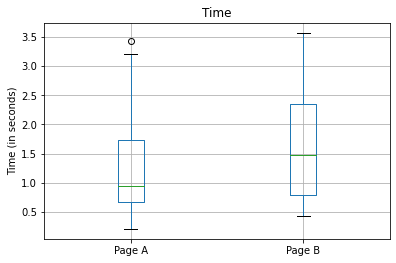

In [39]:
# 웹 페이지 A, B의 세션 시간
ax = session_times.boxplot(by='Page', column='Time')
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

In [40]:
# 페이지 A, B의 평균 세션 시간 차이
mean_a = session_times[session_times['Page'] == 'Page A'].Time.mean()
mean_b = session_times[session_times['Page'] == 'Page B'].Time.mean()
mean_b - mean_a

0.35666666666666713

페이지 A와 페이지 B의 평균 세션 시간의 차이가 우연에 의한 것인지, 통계적으로 중요한 것인지 판단해야 함 -> **순열검정** 적용

모든 세션 시간을 결합하고 섞은 후, 21개의 그룹 (페이지 A와 같은 크기) 과 15개의 그룹 (페이지 B와 같은 크기) 으로 반복해 표본을 추출한다.

In [41]:
# 순열검정 함수
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()

Text(0, 0.5, 'Frequency')

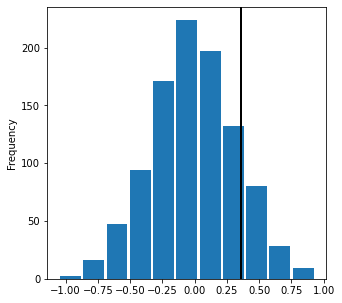

In [42]:
# 페이지 A, B 사이의 세션 시간 차이에 대한 도수분포
perm_diffs = [perm_fun(session_times.Time, 21, 15) for _ in range(1000)]

fig, ax = plt.subplots(figsize = (5,5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = mean_b - mean_a, color='black', lw=2)
ax.set_ylabel('Frequency')

In [43]:
np.mean(np.array(perm_diffs) > mean_b - mean_a)

0.136

페이지 A, B 사이의 세션 시간 차이가 확률분포의 범위 내에 있으므로 이 차이는 통계적으로 유의하지 않음

#### <span style="color:dodgerblue">전체 및 부트스트랩 순열검정</span>

앞선 랜덤 셔플링은 **임의순열검정** (임의화검정)

이외의 순열검정
- **전체순열검정**
- **부트스트랩 순열검정**

전체순열검정
- 데이터를 무작위로 섞고 나누는 대신, 실제로 나눌 수 있는 모든 가능한 조합을 찾음
- 샘플 크기가 작을 때만 실용적
- 셔플링을 많이 반복할수록, 임의순열검정 결과와 유사함
- 정확한 결론을 보장하므로 '정확검정'이라고도 함

부트스트랩 순열검정
- 무작위 순열검정의 2단계, 3단계에서의 비복원 방식 대신, 복원추출로 수행함
- 모집단에서 개체를 선택할 때 임의성 보장 뿐만 아니라 개체가 처리군에 할당될 때에도 임의성 보장

데이터 과학의 입장에서, 전체순열검정과 부트스트랩 순열검정을 구별할 필요는 없음

#### <span style="color:dodgerblue">순열검정 : 데이터 과학의 최종 결론</span>

순열검정은 상대적으로 코딩하고, 해석하고, 설명하기 쉬우며, 정확성을 보증한다.

데이터가 숫자형, 이진형일 수 있고 샘플 크기가 같을 수도 다를 수도 있으며, 데이터가 정규분포를 따라야 한다는 가정도 필요 없다.

### <span style="color:olivedrab">통계적 유의성과 p 값</span>

통계적 유의성
- 통계학자가 자신의 실험 결과가 우연히 일어난 것인지, 우연히 일어날 수 없는 극단적인 것인지를 판단하는 방법

#### <span style="color:dodgerblue">p 값</span>

통계적 유의성을 정확히 측정하기 위한 지표

순열검정으로 얻은 결과 중에서, 관찰된 차이와 같거나 더 큰 차이를 보이는 경우의 비율

p 값이 0.3이라면, 우연히 얻은 결과의 30% 정도가 관찰한 것과 비슷한 정도로 예외적인 결과를 얻을 것으로 기대됨

In [44]:
survivors = np.array([[200, 23739 - 200], [182, 22588 - 182]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)

print(f'p-value for single sided test : {p_value / 2:.4f}')

p-value for single sided test : 0.3498


#### <span style="color:dodgerblue">유의수준</span>

랜덤 모델이 주어졌을 때, 극단적인 결과가 나올 확률

p 값을 통해 전달하고자 하는 의미 : 결과가 우연에서 비롯될 확률

실제 p 값이 나타내는 것 : 랜덤 모델이 주어졌을 때, 그 결과가 관찰된 결과보다 더 극단적일 확률

p 값의 사용에 대한 경고를 촉구하는 성명서에서의 6가지 원칙
1. p 값은 이 데이터가 특정 통계 모델과 얼마나 상반되는지 알 수 있음
2. p 값은 연구 가설이 사실일 확률이나, 데이터가 랜덤하게 생성되었을 확률을 추정하는 것이 아님
3. 과학적 결론, 비즈니스나 정책 결정은 p 값이 특정 임곗값을 통과하는지 여부를 기준으로 해서는 안됨
4. 적절한 추론을 위해서는 완전한 보고나 투명성이 요구됨
5. p 값 또는 통계적 유의성은 효과의 크기나 결과의 중요성을 의미하지 않음
6. p 값 그 자체는 모델이나 가설에 대한 증거를 측정하기 위한 좋은 지표는 아님

#### <span style="color:dodgerblue">제1종과 제2종 오류</span>

통계적 유의성을 평가할 때 발생할 수 있는 두 가지 유형의 오류

- 제 1종 오류 : 우연히 발생했지만, 사실이라고 잘못 판단하는 경우
    - 우연히 일어난 일에 속지 않는 것이 가장 중요한 기능이므로, 1종 오류를 최소화하도록 가설 설계
- 제 2종 오류 : 실제로 있는 것이지만, 우연히 발생했다고 잘못 판단하는 경우
    - 표본크기가 너무 작아서 효과를 알아낼 수 없음

### <span style="color:olivedrab">t 검정</span>

제일 대표적인 유의성검정 방법

모든 유의성검정은 관심 있는 효과를 측정하기 위한 검정통계량을 지정함

관찰된 효과가 정상적인 랜덤 변이의 범위 내에 있는지 여부를 판단함

In [45]:
res = stats.ttest_ind(session_times[session_times.Page == 'Page A'].Time,
                     session_times[session_times.Page == 'Page B'].Time,
                     equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.1408


### <span style="color:olivedrab">다중검정</span>

다중검정에서는 예측변수가 많아질수록 1종 오류가 발생할 가능성이 높아진다.

ex) 0.05의 유의수준에서 20번의 유의성검정을 수행하면, 20번 모두 무의미하다고 올바른 검정 결과를 보일 확률은 $0.95^{20} = 0.36$<br>
    즉, 적어도 한 번의 테스트에서 유의미하다고 잘못 결론 내릴 확률은 0.64<br>
    
**알파 인플레이션** : 1종 오류를 만들 확률인 알파가 더 많은 테스트를 수행할수록 증가하는 다중검정 현상

데이터마이닝에서의 오버피팅 현상과 관련 있음

통계학의 수정 절차를 통해 다중검정에서의 문제점 개선 가능
- 단일 가설검정보다 통계적 유의성에 대한 기준을 엄격하게 설정
- 일반적으로 검정 횟수에 따라 유의수준을 나누는 방법 사용
- 각 검정에 대해 더 작은 알파를 적용함
    - 본페로니 수정 : 알파 / 비교 횟수


### <span style="color:olivedrab">자유도</span>

표본 데이터에서 계산된 통계량에 적용되며, 변화가 가능한 값들의 개수

ex) 10개의 값으로 이루어진 표본에서 평균값을 알고 있다면, 여기에는 9개의 자유도가 있다.<br>
(표본 중 9개를 알고 있다면 10번째는 계싼할 수 있으며 자유롭게 변경할 수 없다.)

많은 확률분포에 적용되는 자유도 모수는 분포의 모양에 영향을 줌

분산, 표준편차에 대한 계산에서 분모의 n-1을 자유도라고 부름
- n을 사용하면 추정치가 살짝 아래쪽으로 편향됨

데이터 과학에서 유의성검정 측면에서는 중요하지 않음
- 보통 데이터가 충분히 크기 때문에, n과 n-1은 거의 차이가 없음

회귀에서 요인변수를 사용할 때는 중요함
- 범주형 변수를 이진 지표로 더미화할 때 자유도를 신경써야 함<br>
- 다중공선성 오차 방지<br>
ex) '요일' 변수를 이진 지표로 바꿀 때 자유도는 6개이다. 

### <span style="color:olivedrab">분산분석 (ANOVA)</span>

여러 그룹들의 수치 데이터를 서로 비교할 때, 여러 그룹 간의 통계적으로 유의미한 차이를 검정하는 통계적 절차

그룹 한 쌍씩 비교하는 횟수가 증가하게 되면, 우연히 일어난 일에 속을 가능성이 커짐<br>
대신, 전체적인 총괄검정을 하는 것이 좋음

-> ANOVA는 이러한 총괄검정에 사용되는 방법

ANOVA의 토대가 되는 재표본추출 과정 (그룹 4개)
1. 모든 데이터를 한 상자에 모음
2. 5개의 값을 갖는 4개의 재표본을 섞어 추출
3. 각 그룹의 평균 기록
4. 네 그룹 평균 사이의 분산 기록
5. 2~4단계 여러 번 반복

### <span style="color:olivedrab">카이제곱검정</span>

동시에 여러 가지 처리를 한 번에 테스트할 때 사용

횟수 관련 데이터에 주로 사용되며 예상되는 분포에 얼마나 잘 맞는지 검정함

#### <span style="color:dodgerblue">재표본추출 방법</span>

In [46]:
click_rates = pd.read_csv('click_rates.csv')
click_rates = click_rates.pivot_table(index='Click', columns='Headline')
clicks = click_rates.loc['Click']
clicks

      Headline  
Rate  Headline A    14
      Headline B     8
      Headline C    12
Name: Click, dtype: int64

재표본추출을 통해, 클릭률이 우연히 발생할 수 있는 것보다 유의미한 정도로 큰지 검정할 수 있음

즉, 이 경우 각 헤드라인 모두가 동일한 클릭률을 갖는다는 가정이 귀무가설에 속한다.

피어슨 잔차들을 제곱합하여 카이제곱통계량을 구할 수 있고, 구한 카이제곱통계량이 귀무가설로 얻을 수 있는 값보다 크다고 할 수 있을지 재표본추출 알고리즘을 통해 검정할 수 있다.
1. 34개의 1과 2966개의 0이 들어 있는 상자를 만든다.
2. 내용물을 섞고, 1000개의 표본을 세 번씩 가져와서 각각의 클릭 수를 계산한다.
3. 얻은 횟수와 기대한 횟수의 차이를 제곱해 합산한다.
4. 2~3단계를 1000번 반복한다.
5. 재표본추출을 통해 얻은 편차의 제곱합이 얼마나 자주 관측값을 초과하는가? 이것이 p 값이다.

### <span style="color:olivedrab">멀티암드 밴딧 알고리즘</span>

### <span style="color:olivedrab">검정력과 표본크기</span>

## 회귀와 예측

### <span style="color:olivedrab">단순선형회귀</span>

두 변수 간의 관계에 대한 모델

상관관계 : 두 변수 사이의 전체적인 관련 강도 제공<br>
회귀 : 관계 자체를 정량화하는 방법

예측하고자 하는 변수 : 종속변수, 목표변수, Y 변수, 응답변수, 반응변수, 출력<br>
예측하기 위해 사용되는 변수 : 독립변수, 예측변수, X 변수, 피쳐, 속성

#### <span style="color:dodgerblue">회귀식</span>

$Y = b_0 + b_1X$

다음 식으로 선형 관계를 이용해 변수 X로부터 변수 Y 예측

$b_0$ : 절편(상수)<BR>
$b_1$ : X의 기울기, 계수

In [47]:
lung

,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1
...,...,...
117,450,22
118,490,22
119,500,22
120,370,23


<Figure size 720x720 with 0 Axes>

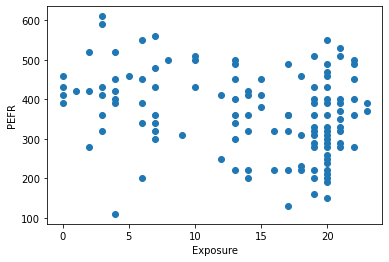

<Figure size 720x720 with 0 Axes>

In [48]:
# 노동자들이 면진에 노출된 연수와 폐활량 간의 산점도
plt.scatter(x=lung['Exposure'], y=lung['PEFR'])
plt.xlabel('Exposure')
plt.ylabel('PEFR')
plt.figure(figsize=(10,10))

In [49]:
# 선형 회귀 모델
predictors = ['Exposure']
outcome = 'PEFR'

lr = LinearRegression()
lr.fit(lung[predictors], lung[outcome])

print(f'Intercept: {lr.intercept_}') # 절편
print(f'Coefficient Exposure: {lr.coef_[0]}') # 기울기

Intercept: 424.582806573957
Coefficient Exposure: -4.1845764854614425


#### <span style="color:dodgerblue">적합값과 잔차</span>

회귀분석에서 중요한 개념 : 적합값(예측값), 잔차(예측 오차)

$Y_i = b_0 + b_1X_i + e_i$ ($e_i$ : 오차항)

추정치라는 것을 나타내기 위해 $e_i$를 지우고 hat 표기법 추가할 수 있음

$\hat{Y_i} = \hat{b_0} + \hat{b_1}X_i$

즉, 잔차 $\hat{e_i} = Y_i - \hat{Y_I}$

In [50]:
fitted = lr.predict(lung[predictors]) # 적합값(예측값)
residuals = lung[outcome] - fitted # 실제값 - 적합값 (오차)

pd.DataFrame([lung[outcome], fitted, residuals], index=['실제값', '적합값', '오차'])

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
실제값,390.000000,410.000000,430.000000,460.000000,420.00000,280.000000,420.000000,520.000000,610.000000,590.000000,...,510.0000,530.0000,280.000000,360.000000,400.000000,450.000000,490.000000,500.000000,370.000000,390.000000
적합값,424.582807,424.582807,424.582807,424.582807,420.39823,416.213654,416.213654,416.213654,412.029077,412.029077,...,336.7067,336.7067,332.522124,332.522124,332.522124,332.522124,332.522124,332.522124,328.337547,328.337547
오차,-34.582807,-14.582807,5.417193,35.417193,-0.39823,-136.213654,3.786346,103.786346,197.970923,177.970923,...,173.2933,193.2933,-52.522124,27.477876,67.477876,117.477876,157.477876,167.477876,41.662453,61.662453


#### <span style="color:dodgerblue">최소제곱</span>

잔차제곱(RSS) : 잔차들을 제곱한 값들의 합

일반적으로 회귀선은 잔차제곱을 최소화하는 선 - 최소제곱회귀, 보통최소제곱회귀

RSS 최소화하는 방법으로 $\hat{b_0}, \hat{b_1}$ 추정

계산의 편의성 덕분에 최소제곱이 널리 사용됨 But, 특잇값에 매우 민감

#### <span style="color:dodgerblue">예측 대 설명</span>

데이터를 피팅한 회귀 모델은 X의 변화가 Y의 변화를 유도하도록 설명되지만, 회귀방정식 자체가 인과관계를 정확히 증명하는 것은 아님

ex) 회귀방정식은 웹 광고에서 클릭 수와 전환율 간의 명확한 관계를 보여주지만, 광고 클릭이 판매로 연결된다는 결론을 끌어내지는 못함<br>
인과관계에 대한 결론을 이끌어내기 위해서는 추가 지식을 발휘해야 한다.

### <span style="color:olivedrab">다중선형회귀</span>

예측변수가 여러 개일 때의 회귀식

$Y = b_0 + b_1X_1 + b_2X_2 + b_pX_p + e$

각 계수와 그 변수들 사이의 관계는 선형이므로 선형모형

#### <span style="color:dodgerblue">킹 카운티 주택 정보 예제</span>

다중선형회귀분석의 대표적 사례 : 주택 가치 추정

In [51]:
house

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27057,2011-04-08,325000,9842300710,Single Family,2011-04-01,318700,0.732307,443803.0,1,5468,...,1.75,3,7,1951,0,0,201000,172000,98126,False
27058,2007-09-28,1580000,9845500010,Single Family,2007-09-01,433500,0.996094,1586196.0,1,23914,...,4.50,4,11,2000,0,1,703000,951000,98040,False
27061,2012-07-09,165000,9899200010,Single Family,2012-07-01,325300,0.747472,220744.0,1,11170,...,1.00,4,6,1971,0,0,92000,130000,98055,False
27062,2006-05-26,315000,9900000355,Single Family,2006-05-01,400600,0.920496,342207.0,1,6223,...,2.00,3,7,1939,0,0,103000,212000,98166,False


In [52]:
subset = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']

house_ml = house[subset]
house_ml.head()

,AdjSalePrice,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade
1,300805.0,2400,9373,3.00,6,7
2,1076162.0,3764,20156,3.75,4,10
3,761805.0,2060,26036,1.75,4,8
4,442065.0,3200,8618,3.75,5,7
5,297065.0,1720,8620,1.75,4,7


In [53]:
X = house_ml.loc[:,'SqFtTotLiving':]
y = house_ml.loc[:,'AdjSalePrice']

house_lm = LinearRegression()
house_lm.fit(X, y)

LinearRegression()

In [54]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
print(f'Intercept : {house_lm.intercept_:.3f}')
print('Coefficients :')
for name, coef in zip(predictors, house_lm.coef_):
    print(f'{name}: {coef:.3f}')

Intercept : -521871.368
Coefficients :
SqFtTotLiving: 228.831
SqFtLot: -0.060
Bathrooms: -19442.840
Bedrooms: -47769.955
BldgGrade: 106106.963


#### <span style="color:dodgerblue">모형 평가</span>

데이터 과학 관점에서 가장 중요한 성능 지표

**RMSE (제곱근평균제곱오차)** : 예측된 $\hat{y_i}$ 값들의 평균제곱오차의 제곱근<br>
전반적인 모델의 정확도 측정, 다른 모델과 비교하기 위한 기준

In [55]:
fitted = house_lm.predict(X)
RMSE = np.sqrt(mean_squared_error(y, fitted))
r2 = r2_score(y, fitted)
print(f'RMSE : {RMSE:.0f}')
print(f'r2 : {r2:.3f}')

RMSE : 261220
r2 : 0.541


In [56]:
# 회귀모델에 대한 세부 분석
model = sm.OLS(y, X.assign(const = 1)) # 값이 1인 상수 열을 예측변수에 추가 (절편을 모델링하기 위함)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Mon, 29 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:11:21   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   228.8306      3.899     58.694      0.000     221.189     236.472
SqFtLot          -0.0605      0.061     -0.988      0.323      -0.180       0.059
Bathrooms     -1.944e+04   3625.388     -5.363      0.000   -2.65e+04   -1.23e+04
Bedrooms      -4.777e+04   2489.732    -19.187      0.000   -5.27e+04   -4.29e+04
BldgGrade      1.061e+05   2396.445     44.277      0.000    1.01e+05    1.11e+05
const         -5.219e+05   1.57e+04    -33.342      0.000   -5.53e+05   -4.91e+05
==============================================================================
Omnibus:                    29676.557   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19390738.346
Skew:                           6.889   Prob(JB):                         0.00
Kurtosis:                     145.559   Cond. No.                     2.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$R^2$ (결정계수) : 모델 데이터의 변동률 (0~1)<br>
모델이 데이터에 얼마나 적합한지 평가함

t 통계량과 p 값 : 계수가 통계적으로 유의미한 정도<br>
예측변수와 목표변수를 랜덤하게 재배치했을 때 우연히 얻을 수 있는 범위를 어느 정도 벗어났는지 측정

**t 통계량이 높을수록, p 값이 낮을수록 예측변수는 더욱 유의미함**

#### <span style="color:dodgerblue">교차타당성검사</span>

데이터 수가 커지면서 표본 밖 유효성 검사는 더욱 중요해짐

일반적으로 대부분의 데이터는 적합한 모델을 찾는 데 사용하고, 나머지 데이터 (홀드아웃 샘플) 는 모델을 테스트하는 데 사용

홀드아웃 샘플을 사용하더라도, 상대적으로 작은 홀드아웃 샘플의 변동성으로 불확실성을 초래할 수 있음

**교차타당성검사** : 홀드아웃 샘플 아이디어를 여러 개의 연속된 홀드아웃 샘플로 확장한 것

기본적인 k 다중 교차타당성검사 알고리즘
1. 1/k의 데이터를 홀드아웃 샘플로 따로 떼어놓는다.
2. 남아 있는 데이터로 모델 훈련
3. 모델을 1/k 홀드아웃에 적용하고 필요한 모델 평가 지표를 기록
4. 데이터의 첫 번째 1/k를 복원하고, 다음 1/k를 따로 보관
5. 2~3단계 반복
6. 모든 레코드가 홀드아웃 샘플로 사용될 때까지 반복
7. 모델 평가 지표들을 평균과 같은 방식으로 결합

**폴드** : 훈련을 위한 샘플과 홀드아웃 샘플로 데이터를 분할하는 것

#### <span style="color:dodgerblue">모형 선택 및 단계적 회귀</span>

예측변수를 많이 사용할 수 있지만, 이는 좋은 방법이 아님

모든 것이 동일한 조건에서는, 복잡한 모델보다는 단순한 모델을 우선 사용해야 한다는 '오컴의 면도날' 원리 사용

$R^2$ 대신, 모델 복잡성을 함께 고려하는 **Adjusted $R^2$**을 사용하는 것도 좋은 방법<br>
$R_{adj}^2 = 1 - (1 - R^2) \frac{n - 1}{n - P - 1}$

**AIC** : 모델에 항을 추가할수록 불이익을 주는 측정 지표<br>
$AIC = 2P + n\log{(RSS/n)}$

(P : 변수의 개수, n : 레코드의 개수)

AIC를 최소로 하거나, Adjusted $R^2$를 최대로 하는 모델을 찾는 방법
- **부분집합회귀** : 모든 가능한 모델을 검색하는 방법 But, 많은 계산 비용, 대용량 데이터와 변수가 많은 문제에 부적합
- **단계적 회귀**
    - 전체 모델부터 시작해서 별로 의미 없는 변수들을 연속적으로 삭제하는 방법 (**후진제거**)
    - 상수 모델에서 시작해서 연속적으로 변수를 추가하는 방법 (**전진선택**)
    - 예측변수를 연속적으로 추가/삭제하여 AIC를 낮추거나 R 제곱을 높이는 모델을 찾는 방법 (**단계적 회귀분석**)
- **벌점회귀** : 개별 모델 집합들을 명시적으로 검색하는 대신, 모델 적합 방정식에 많은 변수에 대해 모델에 불이익을 주는 제약 조건을 추가하는 방법
    - 계수 크기를 감소시키거나 경우에 따라 거의 0으로 만들어 벌점 적용
    - 많이 사용되는 벌점회귀 방법 : 라소, 능형회귀
    
단계적 회귀, 부분집합회귀는 모델을 평가하고 조정하는 표본 내 방법이므로, 오버피팅이 될 가능성 존재<br>
-> 교차타당성검사를 통해 모델의 유효성 검사

#### <span style="color:dodgerblue">가중회귀</span>

가중회귀의 유용성
- 서로 다른 관측치를 다른 정밀도로 측정했을 때, 역분산 가중치를 얻을 수 있다. 분산이 높을수록 가중치가 낮다.
- 가중치 변수가 집계된 데이터의 각 행이 나타내는 원본 관측치의 수를 인코딩하도록, 행이 여러 경우를 의미하는 데이터를 분석할 수 있다.

In [57]:
house['Year'] = [int(date.split('-')[0]) for date in house.DocumentDate]
house['Weight'] = house.Year - 2005

In [58]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_wt = LinearRegression()
house_wt.fit(house[predictors], house[outcome], sample_weight=house.Weight)

LinearRegression()

In [59]:
print(f'Intercept : {house_wt.intercept_:.3f}')
print('Coefficients :')
for name, coef in zip(predictors, house_wt.coef_):
    print(f'{name}: {coef:.3f}')

Intercept : -584189.329
Coefficients :
SqFtTotLiving: 245.024
SqFtLot: -0.292
Bathrooms: -26085.970
Bedrooms: -53608.876
BldgGrade: 115242.435


기존의 회귀분석의 결과와 가중회귀의 결과가 다른 것을 알 수 있다.

### <span style="color:olivedrab">회귀를 이용한 예측</span>

#### <span style="color:dodgerblue">외삽의 위험</span>

**외삽법** : 모델링에 사용된 데이터 범위를 벗어난 부분까지 모델을 확장하는 것

회귀모형은 외삽하면 안됨
- 잘못된 예측 발생

#### <span style="color:dodgerblue">신뢰구간과 예측구간</span>

신뢰구간 : 여러 값에서 계산된 평균이나 다른 통계량과 관련한 불확실성<br>
예측구간 : 한 값에 대한 불확실성

신뢰구간이 예측구간에 비해 훨씬 좁다.

P개의 예측변수, n개의 레코드가 있는 데이터에 대해 회귀 파라미터에 대한 신뢰구간을 생성하기 위한 부트스트랩 알고리즘
1. 각 행을 하나의 티켓으로 생각하고 개수가 모두 n개인 티켓을 박스에 넣었다고 가정
2. 무작위로 티켓을 뽑아 값을 기록하고 다시 박스에 넣는다.
3. 2번 과정을 n번 반복. 이를 통해 부트스트랩 재표본을 하나 생성
4. 이 표본을 가지고 회귀모형을 구함. 그리고 추정된 계수 기록
5. 2~4번 과정을 1000번 반복
6. 각 계수에 대해 1000개의 부트스트랩 값을 갖는다. 각각에 대해 적합한 백분위수를 구함

### <span style="color:olivedrab">회귀에서의 요인변수</span>

**범주형 변수 : 요인변수**

ex) 대출 목적 - '결혼', '자동차', '부채 정리'

요인변수는 모델에 사용될 수 있도록 다시 수치화해야 함

가장 일반적인 방법 : 변수를 이진 가변수들의 집합으로 변환

#### <span style="color:dodgerblue">가변수 표현</span>

**원-핫 인코딩**

In [60]:
house['PropertyType'].value_counts()

Single Family    20720
Townhouse         1710
Multiplex          257
Name: PropertyType, dtype: int64

In [61]:
pd.get_dummies(house['PropertyType'], drop_first=True)

,Single Family,Townhouse
1,0,0
2,1,0
3,1,0
4,1,0
5,1,0
...,...,...
27057,1,0
27058,1,0
27061,1,0
27062,1,0


**3개의 열이 아니라 2개의 열로 표시되는 이유** (drop_first)

회귀분석에서 P개의 개별 수준을 갖는 요인변수는 보통 P-1개의 열을 갖는 행렬로 표시된다.

회귀모형에 일반적으로 절편이 포함되기 때문에, P-1개의 이진변수의 값을 정의하고 나면 P번째 값을 알 수 있고, 따라서 P번째 값까지 넣게 되면 중복성 문제가 발생할 수 있음 (다중공선성 오류)

In [62]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade', 'PropertyType']

X = pd.get_dummies(house[predictors], drop_first=True)

house_lm_factor = LinearRegression()
house_lm_factor.fit(X, house[outcome])

LinearRegression()

In [63]:
print(f'Intercept : {house_lm_factor.intercept_:.3f}')
print('Coefficients :')
for name, coef in zip(X.columns, house_lm_factor.coef_):
    print(f'{name}: {coef:.3f}')

Intercept : -446841.366
Coefficients :
SqFtTotLiving: 223.374
SqFtLot: -0.070
Bathrooms: -15979.013
Bedrooms: -50889.732
BldgGrade: 109416.305
PropertyType_Single Family: -84678.216
PropertyType_Townhouse: -115121.979


#### <span style="color:dodgerblue">다수의 수준을 갖는 요인변수들</span>

한 요인변수에 다수의 수준을 갖는 경우
- 유용한 정보가 범주에 포함되는지 여부 판단
- 모든 요소 유지 or 수준 통합 결정

In [64]:
pd.DataFrame(house['ZipCode'].value_counts()).T

,98038,98103,98042,98115,98117,98052,98034,98033,98059,98074,...,98051,98024,98354,98050,98057,98288,98224,98043,98068,98113
ZipCode,788,671,641,620,619,614,575,517,513,502,...,32,31,9,7,4,4,3,1,1,1


총 80개의 수준을 가지므로, 모든 수준을 원-핫 인코딩하여 79개의 계수가 생성되지만, 너무 많음

- 대도시 지역의 지리적 위치에 대응되는 첫 두세자리만을 이용하는 방법
    - 이 데이터의 경우 대부분이 980xx, 981xx이므로 비효율적
- 매매 가격과 같은 다른 변수에 따라 우편번호를 그룹으로 묶는 방법
- 초기 모델의 잔차를 이용해 우편번호 그룹을 만드는 방법

In [65]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
zip_groups = pd.DataFrame([
    *pd.DataFrame({
        'ZipCode' : house['ZipCode'],
        'residual' : house[outcome] - house_lm.predict(house[predictors]),
    })
    .groupby(['ZipCode'])
    .apply(lambda x: {
        'ZipCode' : x.iloc[0,0],
        'count' : len(x),
        'median_residual': x.residual.median()
    })
]).sort_values('median_residual')
zip_groups

,ZipCode,count,median_residual
36,98057,4,-537321.644462
27,98043,1,-307661.343614
46,98092,289,-193569.183599
23,98038,788,-150066.477035
31,98051,32,-142352.869593
...,...,...,...
60,98119,260,174462.549290
54,98112,357,232788.487256
25,98040,244,254004.002463
3,98004,293,383596.028729


각 우편번호에 해당하는 레코드 수 (count) 와 각 우편번호에 대한 잔차의 중간값 (median_residual)을 계산

In [66]:
zip_groups['cum_count'] = np.cumsum(zip_groups['count']) # 누적으로 count 세기
zip_groups['ZipGroup'] = pd.qcut(zip_groups['cum_count'], 5, labels=False, retbins=False) # 5개의 그룹으로 분할

to_join = zip_groups[['ZipCode', 'ZipGroup']].set_index('ZipCode')
house = house.join(to_join, on='ZipCode') # ZipCode에 해당되는 ZipGroup으로 house 데이터프레임에 join
house['ZipGroup'] = house['ZipGroup'].astype('category') # 범주형 변수로 변환

중간값으로 정렬한 우편번호를 5개의 그룹으로 분할

#### <span style="color:dodgerblue">순서가 있는 요인변수</span>

순서를 갖는 요인변수의 예시
- 대출 등급 : 'A', 'B', 'C'

일반적으로 숫자 값으로 변환하여 그대로 사용 (수치형 변수로 전환)
- 그냥 요인변수로 다룰 경우, 순서에 대한 정보 소실

### <span style="color:olivedrab">회귀방정식 해석</span>

**변수간 상관** : 변수들이 같은 방향으로 움직이려는 경향 (변수끼리 강한 상관관계 존재)<BR>
**다중공선성** : 예측변수들이 거의 완벽에 가까운 상관성을 가지면, 회귀는 불안정하며 계산이 불가능함

#### <span style="color:dodgerblue">예측변수간 상관</span>

In [68]:
print(f'Intercept : {house_lm_factor.intercept_:.3f}')
print('Coefficients :')
for name, coef in zip(X.columns, house_lm_factor.coef_):
    print(f'{name}: {coef:.3f}')

Intercept : -446841.366
Coefficients :
SqFtTotLiving: 223.374
SqFtLot: -0.070
Bathrooms: -15979.013
Bedrooms: -50889.732
BldgGrade: 109416.305
PropertyType_Single Family: -84678.216
PropertyType_Townhouse: -115121.979


Bedroom의 계수가 음수인 것의 의미
- 침실 개수를 늘릴 수록 그 가치가 감소한다. But, 비상식적
- 예측변수들끼리 상관성이 존재하기 때문
    - 집이 클수록 침실이 더 많은 경향이 있고, 침실 수보다는 집의 크기가 가격에 더 큰 영향
    
상호 연관된 예측변수들을 사용하면 회귀계수의 부호와 값의 의미를 해석하기 어려울 수 있음

서로 상관성이 존재하는 예측변수들을 삭제해 변수의 개수를 줄인 이후 모델 적합

In [70]:
predictors = ['Bedrooms', 'BldgGrade', 'PropertyType', 'YrBuilt']
outcome = 'AdjSalePrice'

X = pd.get_dummies(house[predictors], drop_first=True)

reduced_lm = LinearRegression()
reduced_lm.fit(X, house[outcome])

LinearRegression()

In [72]:
print(f'Intercept : {reduced_lm.intercept_:.3f}')
print('Coefficients :')
for name, coef in zip(X.columns, reduced_lm.coef_):
    print(f'{name}: {coef:.3f}')

Intercept : 4913973.344
Coefficients :
Bedrooms: 27150.537
BldgGrade: 248997.794
YrBuilt: -3211.745
PropertyType_Single Family: -19898.495
PropertyType_Townhouse: -47355.437


#### <span style="color:dodgerblue">다중공선성</span>

변수 상관이 극단적으로 발생 : 다중공선성 발생

완전 다중공선성 : 한 예측변수가 다른 변수들의 선형결합으로 표현되는 것을 의미

다중공선성이 발생하는 경우
- 오류로 인해 한 변수가 여러 번 포함된 경우
- 요인변수로부터 P-1개가 아닌 P개의 가변수가 만들어진 경우
- 두 변수가 서로 거의 완벽하게 상관성이 있는 경우

회귀분석에서는 반드시 다중공선성 문제를 해결해야 함
- 다중공선성이 사라질 때까지 변수 제거

비선형회귀 (트리, 클러스터링, KNN) 등에서는 다중공선성이 거의 문제가 되지 않음

#### <span style="color:dodgerblue">교란변수</span>

변수 상관이 극단적으로 발생 : 다중공선성 발생

완전 다중공선성 : 한 예측변수가 다른 변수들의 선형결합으로 표현되는 것을 의미

다중공선성이 발생하는 경우
- 오류로 인해 한 변수가 여러 번 포함된 경우
- 요인변수로부터 P-1개가 아닌 P개의 가변수가 만들어진 경우
- 두 변수가 서로 거의 완벽하게 상관성이 있는 경우

회귀분석에서는 반드시 다중공선성 문제를 해결해야 함
- 다중공선성이 사라질 때까지 변수 제거

비선형회귀 (트리, 클러스터링, KNN) 등에서는 다중공선성이 거의 문제가 되지 않음